## DATASETS

### Income by Country
https://www.kaggle.com/frankmollard/income-by-country

### Women Entrepreneurship and Labor Force (OCDE Countries)
https://www.kaggle.com/babyoda/women-entrepreneurship-and-labor-force

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
# Female participation in the workforce
df1 = pd.read_csv("Dataset3.csv", sep=";")
df_women = df1.copy()

In [3]:
# Female participation in the workforce dataframe
df_women = df_women[["Country", "Female Labor Force Participation Rate"]]

In [4]:
# Female Gross National Income
df2 = pd.read_excel("Income by Country.xls", sheet_name="Estimated GNI female")
df_gni_female = df2.copy()

In [5]:
# Female Gross National Income dataframe
df_gni_female = df_gni_female[["Country", 2018]]
df_gni_female = df_gni_female.rename(columns={2018:"Estimated Female GNI per capita (OCDE)"})

In [6]:
# Mergeing of both dataframes for analysis and to plot graph
merged_df = df_women.merge(df_gni_female, left_on='Country', right_on='Country', how="inner")
merged_df = merged_df.rename(columns={2018:"Estimated Female GNI per capita (OCDE)", 
                                      "Female Labor Force Participation Rate":"Female Labor Force Participation Rate (OCDE)"}).set_index("Country")

<IPython.core.display.Javascript object>


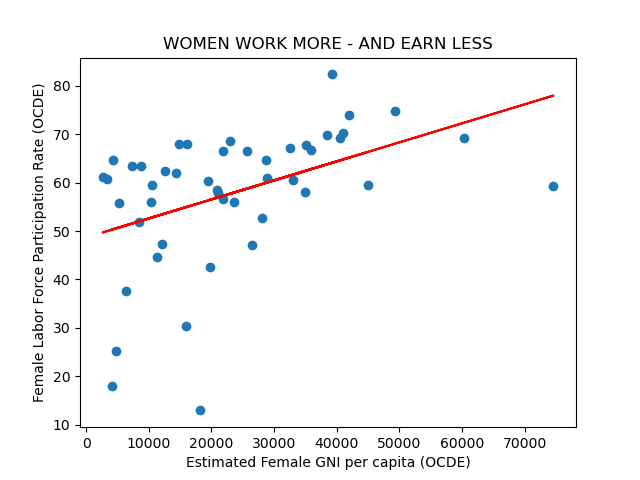

<AxesSubplot:title={'center':'WOMEN WORK MORE - AND EARN LESS'}, xlabel='Estimated Female GNI per capita (OCDE)', ylabel='Female Labor Force Participation Rate (OCDE)'>

In [7]:
merged_df.plot(x="Estimated Female GNI per capita (OCDE)", y="Female Labor Force Participation Rate (OCDE)", 
               kind="scatter", title="WOMEN WORK MORE - AND EARN LESS")

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
X = merged_df["Estimated Female GNI per capita (OCDE)"]
Y = merged_df["Female Labor Force Participation Rate (OCDE)"]

linear_regressor = LinearRegression()  # create object for the class

X = X.values.reshape(-1, 1)  # values converts it into a numpy array
Y = Y.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

In [10]:
# Plot linear regression
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()